<a href="https://colab.research.google.com/github/sachinbb7/Machine-Learning-Projects/blob/main/Ola_Ensembling_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Define Problem Statement and perform Exploratory Data Analysis**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

**Demographics** (city, age, gender etc.)
**Tenure information** (joining date, Last Date)
**Historical data regarding the performance of the driver** (Quarterly rating, Monthly business acquired, grade, Income)

# **Additional Perspectives**

In addressing the churn classification challenge, it is crucial to monitor diverse metrics such as Recall and ROC-AUC curve. Given the intense competition in this industry, our emphasis should be on the significant feature importances derived from the training process.

# **Column Profiling:**

1. **MMMM-YY** : Reporting Date (Monthly)
2. **Driver_ID** : Unique id for drivers
3. **Age** : Age of the driver
4. **Gender** : Gender of the driver – Male : 0, Female: 1
5. **City** : City Code of the driver
6. **Education_Level** : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. **Income** : Monthly average Income of the driver
8. **Date Of Joining** : Joining date for the driver
9. **LastWorkingDate** : Last date of working for the driver
10. **Joining Designation** : Designation of the driver at the time of joining
11. **Grade** : Grade of the driver at the time of reporting
12. **Total Business Value** : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

# **Concepts Tested:**

1.  **Ensemble Learning**- Bagging
2.  **Ensemble Learning**- Boosting
3.   KNN Imputation of Missing Values


Working with an imbalanced dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer

### **Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.**

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 31.3MB/s]


In [ ]:
df = pd.read_csv("ola_driver_scaler.csv")

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.drop(columns= "Unnamed: 0", inplace = True)

In [ ]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])

In [ ]:
df.shape

(19104, 13)

In [ ]:
df.dtypes

MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

In [ ]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
df.groupby("Driver_ID")[["LastWorkingDate"]].aggregate(lambda x : np.unique(x)[0]).reset_index()

,Driver_ID,LastWorkingDate
0,1,2019-03-11
1,2,NaT
2,4,2020-04-27
3,5,2019-03-07
4,6,NaT
...,...,...
2376,2784,NaT
2377,2785,2020-10-28
2378,2786,2019-09-22
2379,2787,2019-06-20


In [ ]:
#df["LastWorkingDate"].fillna(method = "bfill", inplace= True)

In [ ]:
(df.isnull().sum()/ len(df))*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [ ]:
num_variables = df.select_dtypes(np.number)
num_variables.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
cat_variable = df.select_dtypes(["object","datetime64[ns]"])
cat_variable.columns

Index(['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate'], dtype='object')

# **Data Preprocessing**

### **KNN Imputation**

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num_variables)
data = imputer.transform(num_variables)

In [ ]:
import pandas as pd

column_data = pd.DataFrame(data, columns = num_variables.columns)

In [ ]:
column_data.isna().sum()

Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [ ]:
new_data = pd.concat([cat_variable,column_data], axis=1)

In [ ]:
new_data.head()

,MMM-YY,City,Dateofjoining,LastWorkingDate,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,C23,2018-12-24,NaT,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2019-02-01,C23,2018-12-24,NaT,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2019-03-01,C23,2018-12-24,2019-03-11,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2020-11-01,C7,2020-11-06,NaT,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2020-12-01,C7,2020-11-06,NaT,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [ ]:
agg_values = {
    "Gender" : "last",
    "City" : "first",
  "Dateofjoining" : "first",
  "LastWorkingDate" : "first",
  "Age" : "max",
  "Education_Level" : "max",
  "Joining Designation" : "first",
  "Grade" : "last",
  "Total Business Value" : np.sum,
    "Income" : np.sum

}

In [ ]:
new_data= new_data.groupby(["Driver_ID","MMM-YY"]).aggregate(agg_values).sort_index().reset_index()

In [ ]:
new_data.isna().sum()

Driver_ID                   0
MMM-YY                      0
Gender                      0
City                        0
Dateofjoining               0
LastWorkingDate         17488
Age                         0
Education_Level             0
Joining Designation         0
Grade                       0
Total Business Value        0
Income                      0
dtype: int64

In [ ]:
processed_data = new_data.groupby(["Driver_ID"]).aggregate(agg_values).reset_index()

In [ ]:
processed_data.isna().sum()

Driver_ID                 0
Gender                    0
City                      0
Dateofjoining             0
LastWorkingDate         765
Age                       0
Education_Level           0
Joining Designation       0
Grade                     0
Total Business Value      0
Income                    0
dtype: int64

In [ ]:
processed_data.head()

,Driver_ID,Gender,City,Dateofjoining,LastWorkingDate,Age,Education_Level,Joining Designation,Grade,Total Business Value,Income
0,1.0,0.0,C23,2018-12-24,2019-03-11,28.0,2.0,1.0,1.0,1715580.0,172161.0
1,2.0,0.0,C7,2020-11-06,NaT,31.0,2.0,2.0,2.0,0.0,134032.0
2,4.0,0.0,C13,2019-12-07,2020-04-27,43.0,2.0,2.0,2.0,350000.0,328015.0
3,5.0,0.0,C9,2019-01-09,2019-03-07,29.0,0.0,1.0,1.0,120360.0,139104.0
4,6.0,1.0,C11,2020-07-31,NaT,31.0,1.0,3.0,3.0,1265000.0,393640.0


### **Feature Engineering**

In [ ]:
first_quarter = df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "first"})
last_quarter = df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "last"})

In [ ]:
processed_data["Quarterly_Rating_Increased"] = pd.Series(np.where(last_quarter["Quarterly Rating"] > first_quarter["Quarterly Rating"] , 1 , 0))

In [ ]:
processed_data["target"] = np.where(pd.isna(processed_data["LastWorkingDate"]), 0, 1)

In [ ]:
first_income = df.groupby(["Driver_ID"])[["Income"]].agg("first")
last_income = df.groupby(["Driver_ID"])[["Income"]].agg("last")
processed_data["raise_in_income"] = pd.Series(np.where(last_income["Income"] > first_income["Income"] , 1 , 0))

In [ ]:
processed_data.head()

,Driver_ID,Gender,Dateofjoining,LastWorkingDate,Age,Education_Level,Joining Designation,Grade,Total Business Value,Income,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,year,month,date
0,1.0,0.0,2018-12-24,2019-03-11,28.0,2.0,1.0,1.0,1715580.0,172161.0,...,0,0,0,0,0,0,0,2018,12,24
1,2.0,0.0,2020-11-06,NaT,31.0,2.0,2.0,2.0,0.0,134032.0,...,0,0,0,0,1,0,0,2020,11,6
2,4.0,0.0,2019-12-07,2020-04-27,43.0,2.0,2.0,2.0,350000.0,328015.0,...,0,0,0,0,0,0,0,2019,12,7
3,5.0,0.0,2019-01-09,2019-03-07,29.0,0.0,1.0,1.0,120360.0,139104.0,...,0,0,0,0,0,0,1,2019,1,9
4,6.0,1.0,2020-07-31,NaT,31.0,1.0,3.0,3.0,1265000.0,393640.0,...,0,0,0,0,0,0,0,2020,7,31


In [ ]:
processed_data["raise_in_income"].value_counts(normalize=True)


0    0.98194
1    0.01806
Name: raise_in_income, dtype: float64

In [ ]:
processed_data.describe(include = 'object')


,City
count,2381
unique,29
top,C20
freq,152


In [ ]:
processed_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Gender,2381.0,4.105838e-01,4.913595e-01,0.0,0.0,0.0,1.0,1.0
Age,2381.0,3.377026e+01,5.932235e+00,21.0,30.0,33.0,37.0,58.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Quarterly_Rating_Increased,2381.0,1.503570e-01,3.574961e-01,0.0,0.0,0.0,0.0,1.0
target,2381.0,6.787064e-01,4.670713e-01,0.0,0.0,1.0,1.0,1.0


In [ ]:
n = processed_data.columns

for i in n:
    print("------------------------------------------------------------\n\n")
    print(f"Column : {i}\n")
    print(processed_data[i].value_counts(normalize=True) * 100)

------------------------------------------------------------


Column : Driver_ID

1.0       0.041999
1859.0    0.041999
1861.0    0.041999
1862.0    0.041999
1863.0    0.041999
            ...   
933.0     0.041999
935.0     0.041999
936.0     0.041999
937.0     0.041999
2788.0    0.041999
Name: Driver_ID, Length: 2381, dtype: float64
------------------------------------------------------------


Column : Gender

0.0    58.798824
1.0    40.907182
0.6     0.209996
0.2     0.041999
0.4     0.041999
Name: Gender, dtype: float64
------------------------------------------------------------


Column : City

C20    6.383872
C15    4.241915
C29    4.031919
C26    3.905922
C8     3.737925
C27    3.737925
C10    3.611928
C16    3.527929
C22    3.443931
C3     3.443931
C28    3.443931
C12    3.401932
C5     3.359933
C1     3.359933
C21    3.317934
C14    3.317934
C6     3.275934
C4     3.233935
C7     3.191936
C9     3.149937
C25    3.107938
C23    3.107938
C24    3.065939
C19    3.023940
C2    

### **Univariate Analysis** **(distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**

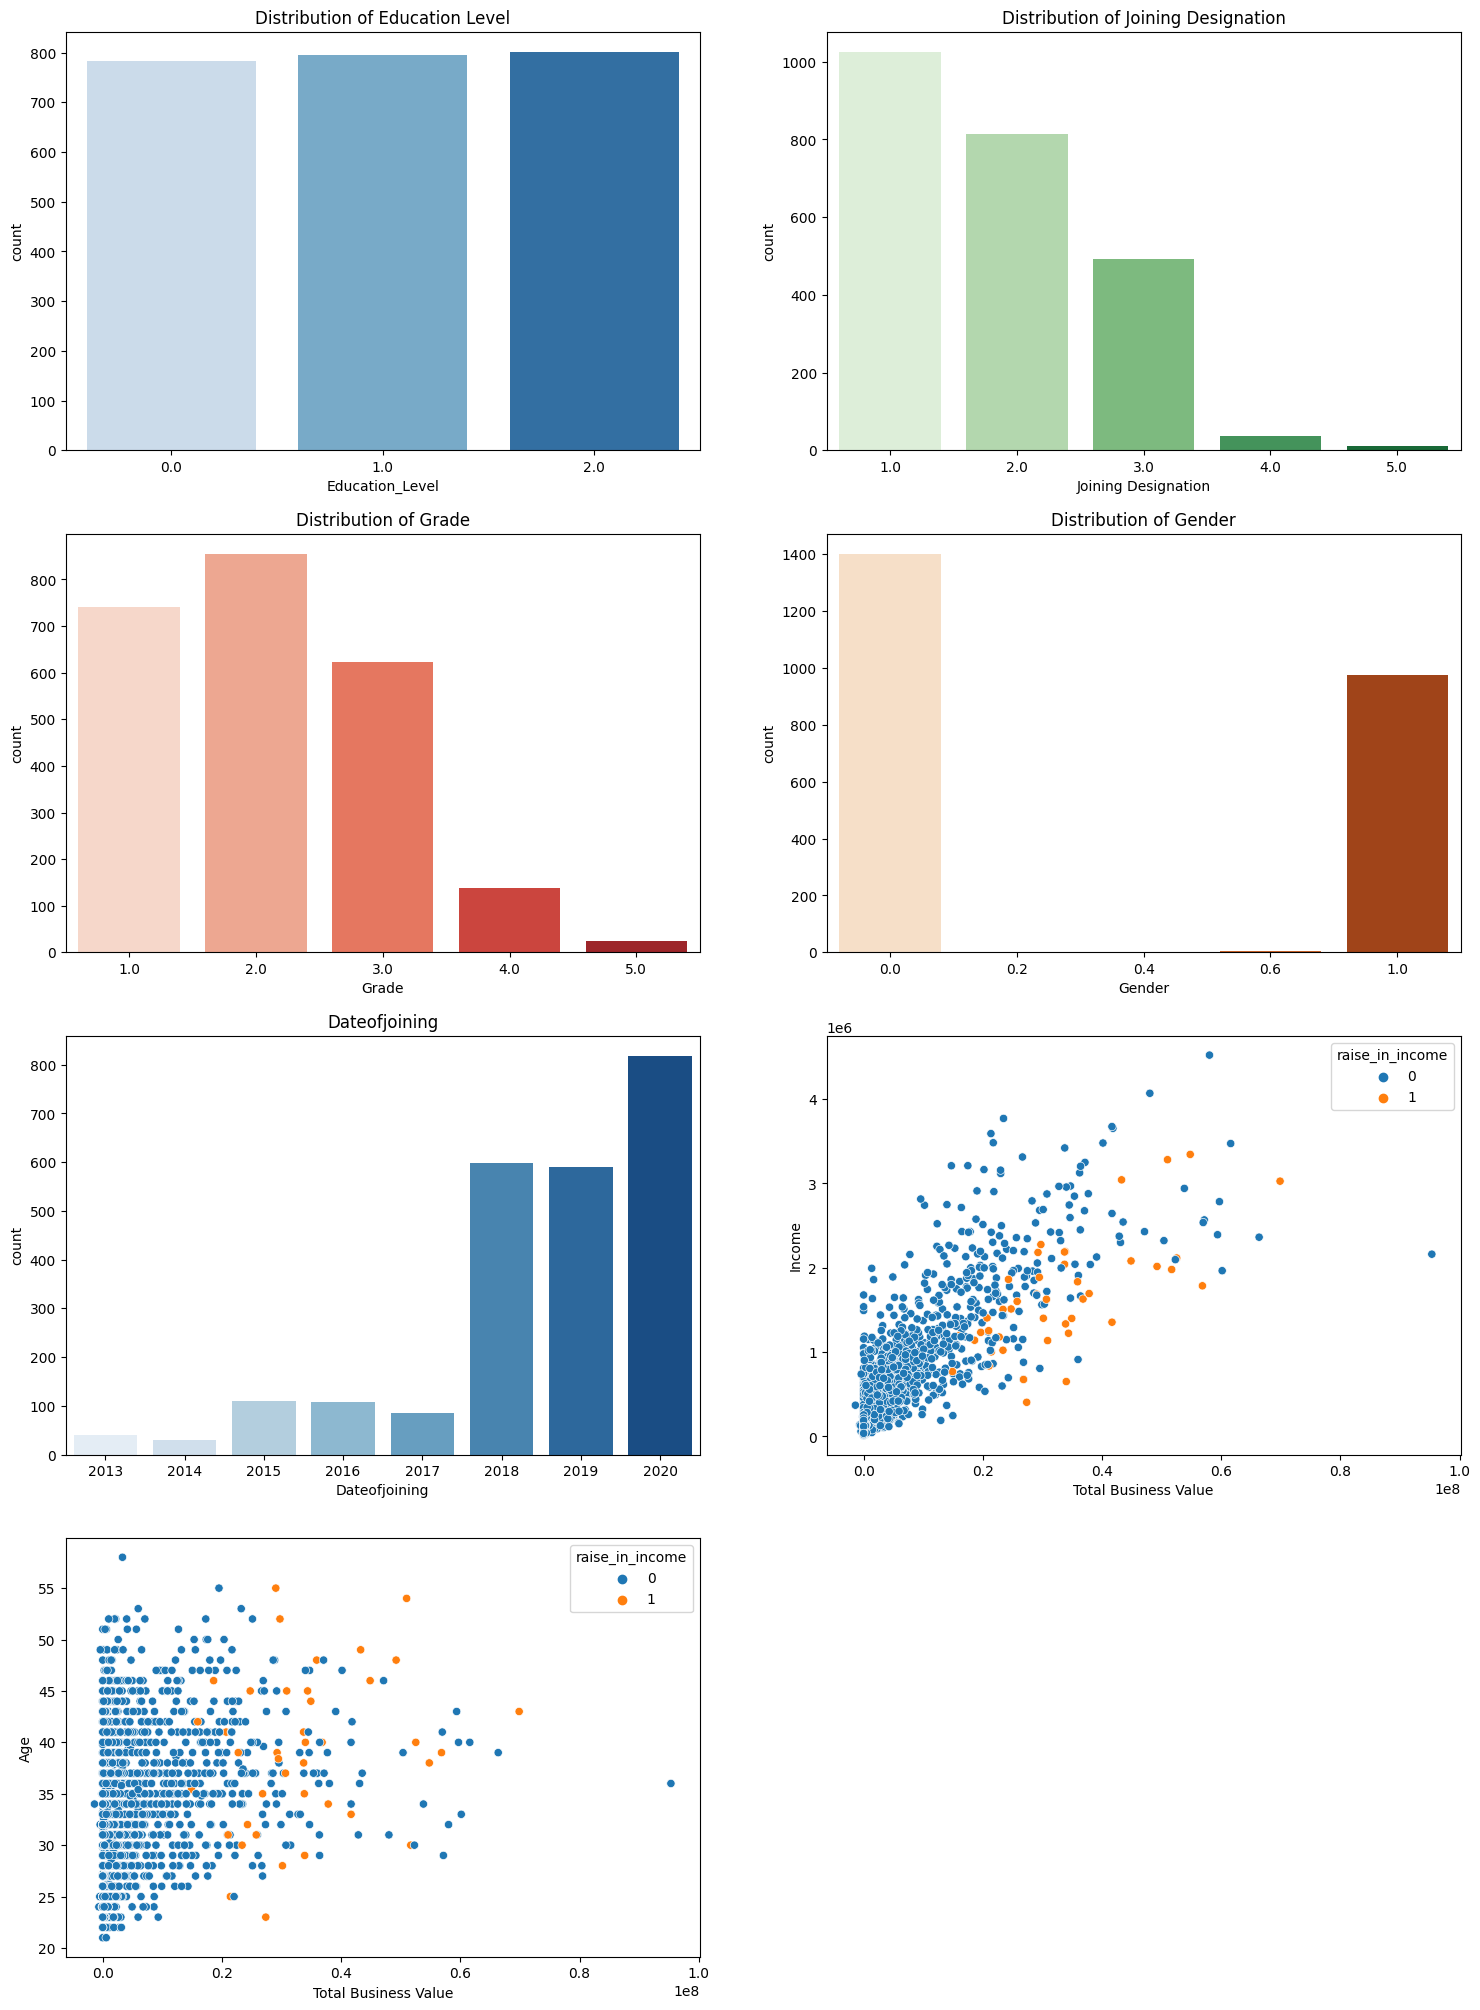

In [ ]:
plt.figure(figsize=(18,25))

plt.subplot(4,2,1)
sns.countplot(x=processed_data['Education_Level'] , palette = 'Blues')
plt.title('Distribution of Education Level')

plt.subplot(4,2,2)
sns.countplot(x=processed_data['Joining Designation'] , palette = 'Greens')
plt.title('Distribution of Joining Designation')

plt.subplot(4,2,3)
sns.countplot(x=processed_data['Grade'] , palette = 'Reds')
plt.title('Distribution of Grade')

plt.subplot(4,2,4)
sns.countplot(x=processed_data['Gender'] , palette = 'Oranges')
plt.title('Distribution of Gender')

plt.subplot(4,2,5)
sns.countplot(x=processed_data['Dateofjoining'].dt.year , palette = 'Blues')
plt.title('Dateofjoining')


plt.subplot(4,2,6)
sns.scatterplot(x=processed_data['Total Business Value'],y=processed_data.Income,hue=processed_data.raise_in_income)

plt.subplot(4,2,7)
sns.scatterplot(x=processed_data['Total Business Value'],y=processed_data.Age,hue=processed_data.raise_in_income)

plt.show()


In [ ]:
processed_data.columns

Index(['Driver_ID', 'Gender', 'City', 'Dateofjoining', 'LastWorkingDate',
       'Age', 'Education_Level', 'Joining Designation', 'Grade',
       'Total Business Value', 'Income', 'Quarterly_Rating_Increased',
       'target', 'raise_in_income'],
      dtype='object')

### **Bivariate Analysis (Relationships between important variables)**

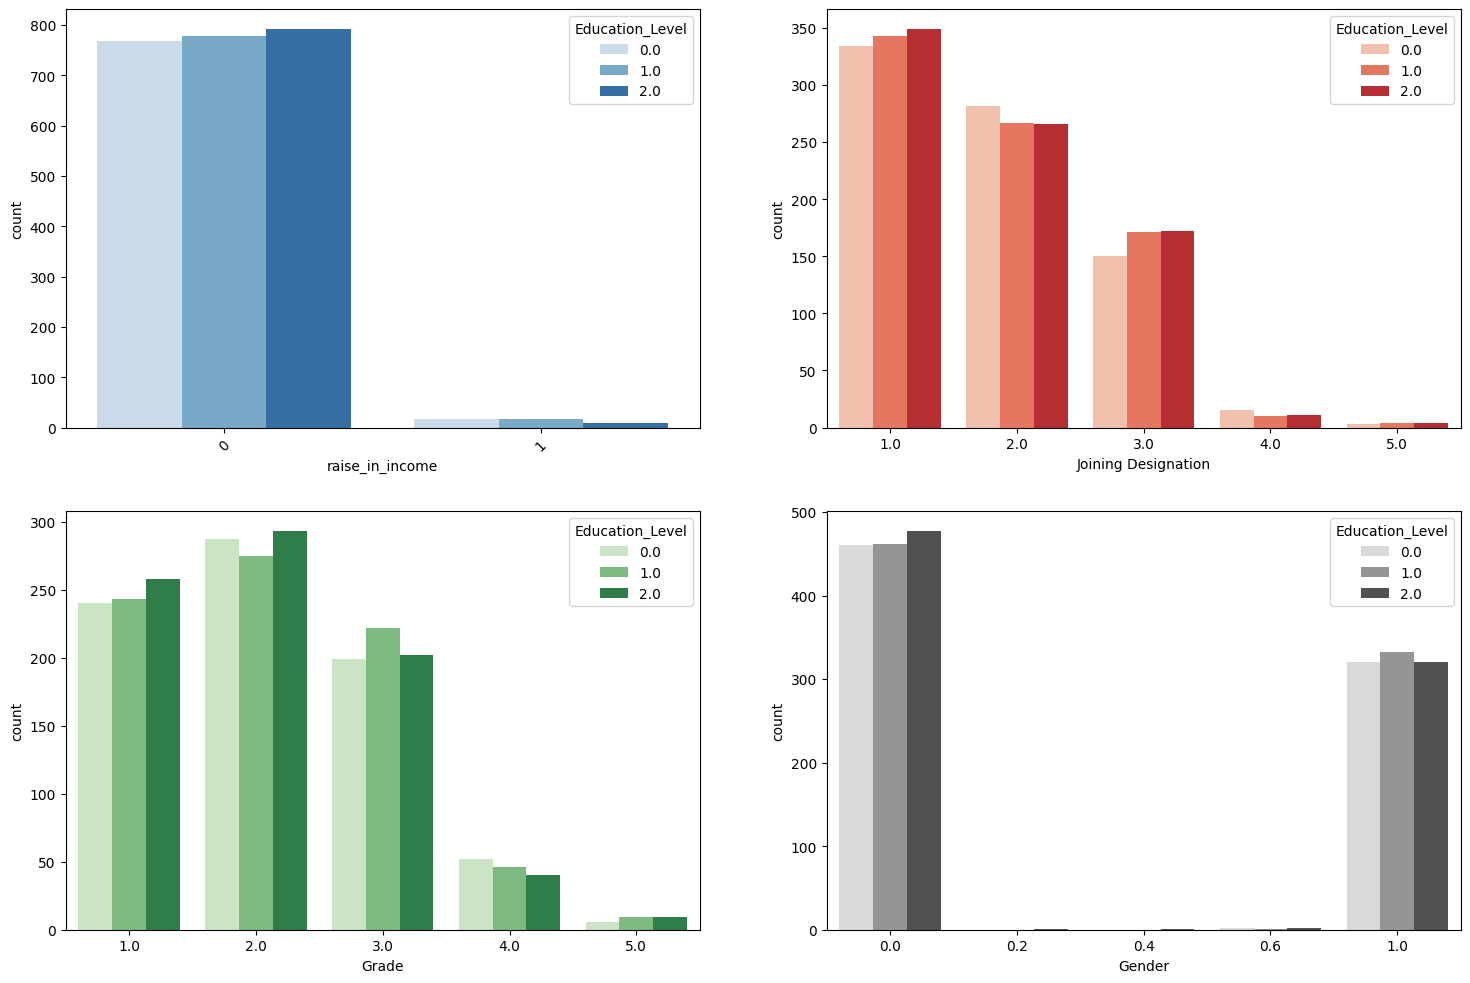

In [ ]:
plt.figure(figsize=(18,25))

plt.subplot(4,2,1)
sns.countplot(x='raise_in_income',data=processed_data,hue='Education_Level', palette = 'Blues')
plt.xticks(rotation=45)

plt.subplot(4,2,2)
sns.countplot(x='Joining Designation',data=processed_data,hue='Education_Level' ,  palette = 'Reds')

plt.subplot(4,2,3)
sns.countplot(x='Grade',data=processed_data,hue='Education_Level' ,  palette = 'Greens')

plt.subplot(4,2,4)
g=sns.countplot(x='Gender',data=processed_data,hue='Education_Level',  palette = 'Greys')

plt.show()

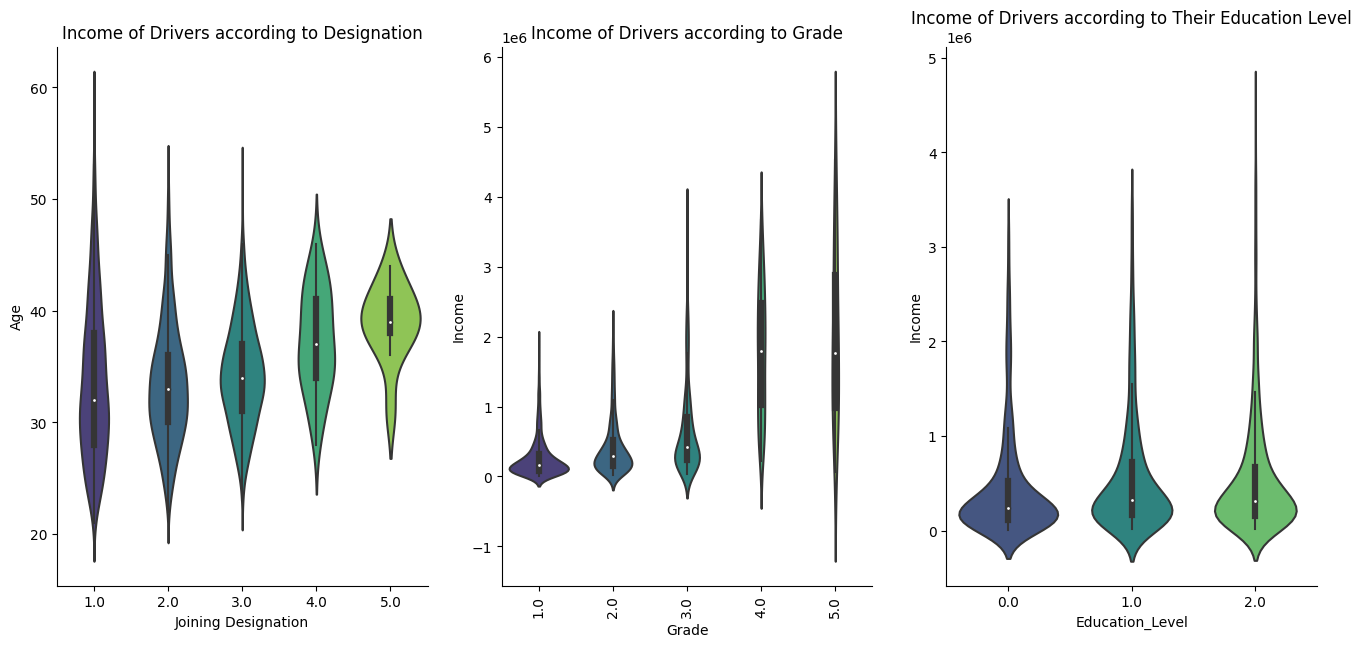

In [ ]:
plt.figure(figsize=(22,7))
plt.subplot(1,4,1)
sns.violinplot(y=processed_data.Age,x=processed_data['Joining Designation'],palette='viridis')
plt.title('Income of Drivers according to Designation', fontsize=12)

plt.subplot(1,4,2)
sns.violinplot(x=processed_data.Grade,y=processed_data.Income,palette='viridis')
plt.title('Income of Drivers according to Grade', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1,4,3)
sns.violinplot(x=processed_data.Education_Level,y=processed_data.Income,palette='viridis')
plt.title('Income of Drivers according to Their Education Level', fontsize=12)

sns.despine()
sns.despine()
plt.show()

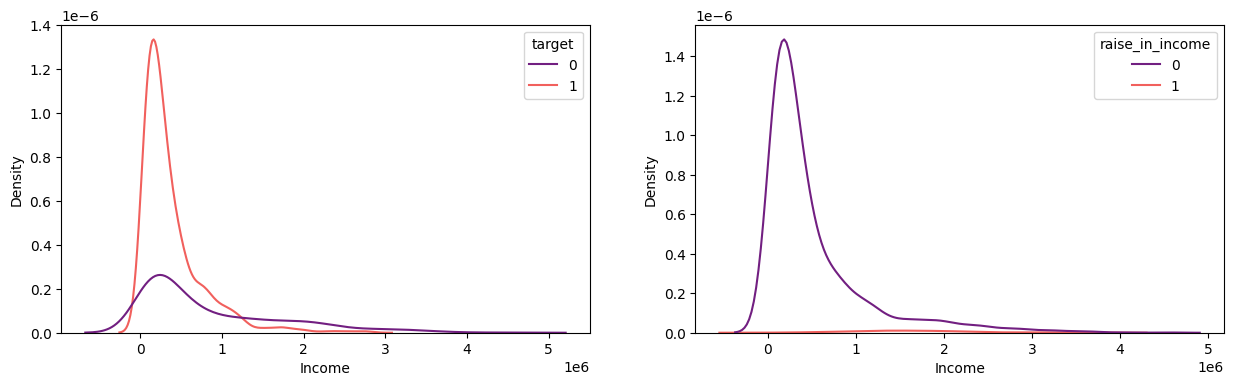

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(x=processed_data.Income,hue=processed_data['target'],palette='magma')
plt.subplot(1,2,2)
sns.kdeplot(x=processed_data.Income,hue=processed_data['raise_in_income'],palette='magma')
plt.show()

<ipython-input-38-5c75a89098ad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(processed_data.corr(method="pearson"), annot=True, cmap="Blues")


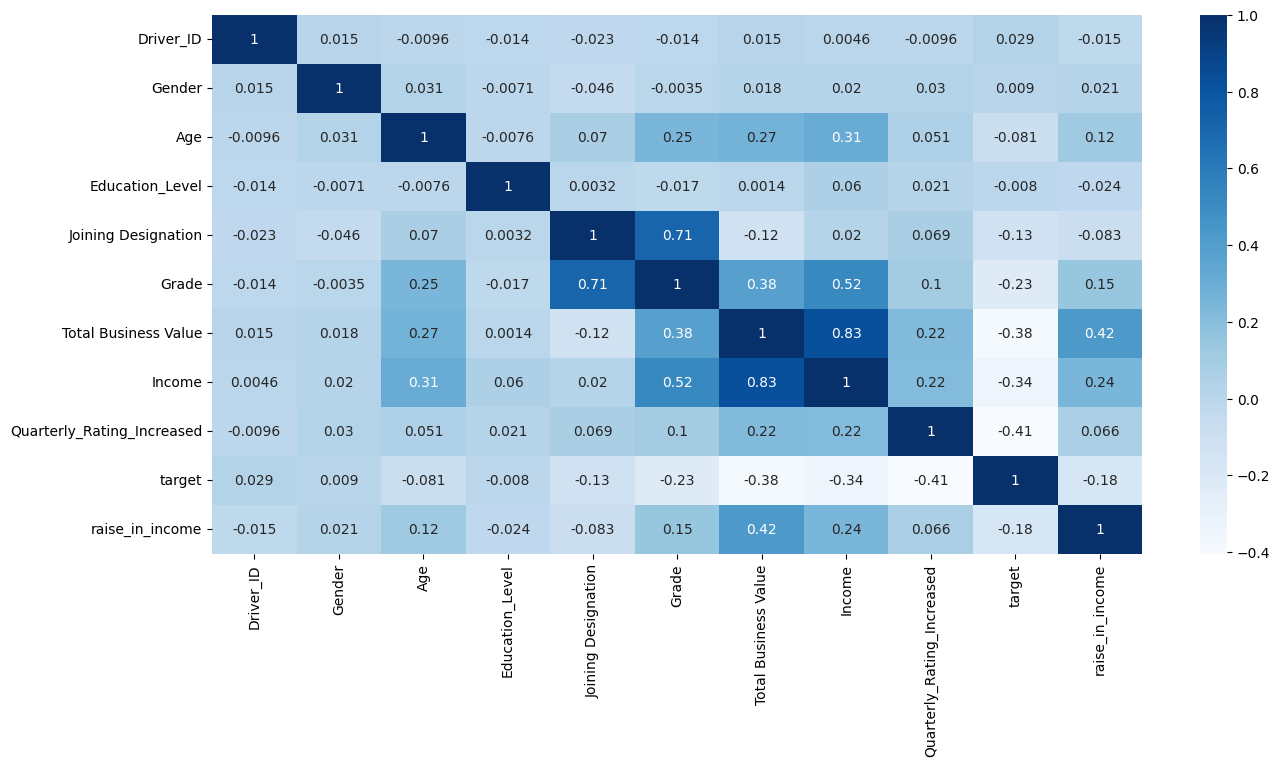

In [ ]:
plt.figure(figsize=(15, 7))

sns.heatmap(processed_data.corr(method="pearson"), annot=True, cmap="Blues")
plt.show()

## **Observations:**

- The workforce comprises 58% male employees and 40% female employees.
- Education level percentages are nearly identical for levels 1 and 2.
- A substantial 98.1% of employees did not receive a raise.
- Approximately 43% of employees initially joined at the lowest designation (1), with 34% at level 2, 20% at level 3, and less than 2% at higher levels.

- Promotion was received by only 54% of employees, while 45% did not, and a mere 2.6% received a raise.
- The employee count has increased over the years along with the number of reportings.
- The Income scatter plot indicates a general increase with age, but a subtle decline is noticed after 45-50.
- Total Business Value scatter plot shows an upward trend with age, followed by a decline after 45.
- Income tends to decrease with higher designations, as about 4% of employees hold positions at these levels.
- Median Income for employees with higher grades is higher.
- Income distribution varies by about 3-5% with different education levels.
- Joining designation tends to increase with higher grades.
- The maximum reporting days is 24.
- Approximately 55% of employee reportings received a Quarterly Rating of 1.
- The number of reportings increases with higher Income and Total Business Value.

In [ ]:
len(processed_data)

2381

### **Encoding**

In [ ]:
import pandas as pd

# Assuming df is defined before this code snippet
# Sample data with a 'City' column
data = {'City': processed_data["City"].values}

# Create a DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding
onehot_encoded = pd.get_dummies(df['City'], prefix='City')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, onehot_encoded], axis=1)

# Print the result
print("Original DataFrame:")
print(df)

print("\nOne-hot encoded DataFrame:")
print(df_encoded)


Original DataFrame:
     City
0     C23
1      C7
2     C13
3      C9
4     C11
...   ...
2376  C24
2377   C9
2378  C19
2379  C20
2380  C27

[2381 rows x 1 columns]

One-hot encoded DataFrame:
     City  City_C1  City_C10  City_C11  City_C12  City_C13  City_C14  \
0     C23        0         0         0         0         0         0   
1      C7        0         0         0         0         0         0   
2     C13        0         0         0         0         1         0   
3      C9        0         0         0         0         0         0   
4     C11        0         0         1         0         0         0   
...   ...      ...       ...       ...       ...       ...       ...   
2376  C24        0         0         0         0         0         0   
2377   C9        0         0         0         0         0         0   
2378  C19        0         0         0         0         0         0   
2379  C20        0         0         0         0         0         0   
2380  C27      

In [ ]:
processed_data = pd.concat([processed_data, df_encoded], axis=1)
processed_data.columns

Index(['Driver_ID', 'Gender', 'City', 'Dateofjoining', 'LastWorkingDate',
       'Age', 'Education_Level', 'Joining Designation', 'Grade',
       'Total Business Value', 'Income', 'Quarterly_Rating_Increased',
       'target', 'raise_in_income', 'City', 'City_C1', 'City_C10', 'City_C11',
       'City_C12', 'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17',
       'City_C18', 'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22',
       'City_C23', 'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28',
       'City_C29', 'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7',
       'City_C8', 'City_C9'],
      dtype='object')

In [ ]:
processed_data.drop(columns= ["City"], inplace=True)

In [ ]:
processed_data.shape

(2381, 42)

In [ ]:
processed_data.head()

,Driver_ID,Gender,Dateofjoining,LastWorkingDate,Age,Education_Level,Joining Designation,Grade,Total Business Value,Income,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1.0,0.0,2018-12-24,2019-03-11,28.0,2.0,1.0,1.0,1715580.0,172161.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0.0,2020-11-06,NaT,31.0,2.0,2.0,2.0,0.0,134032.0,...,0,0,0,0,0,0,0,1,0,0
2,4.0,0.0,2019-12-07,2020-04-27,43.0,2.0,2.0,2.0,350000.0,328015.0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,0.0,2019-01-09,2019-03-07,29.0,0.0,1.0,1.0,120360.0,139104.0,...,0,0,0,0,0,0,0,0,0,1
4,6.0,1.0,2020-07-31,NaT,31.0,1.0,3.0,3.0,1265000.0,393640.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
processed_data["year"] , processed_data["month"] , processed_data["date"] = processed_data["Dateofjoining"].dt.year , processed_data["Dateofjoining"].dt.month , processed_data["Dateofjoining"].dt.day

In [ ]:
x= processed_data.drop(columns = ["Driver_ID", "target","Dateofjoining","LastWorkingDate"])
y= processed_data["target"]

In [ ]:
x.select_dtypes(np.number).columns

Index(['Gender', 'Age', 'Education_Level', 'Joining Designation', 'Grade',
       'Total Business Value', 'Income', 'Quarterly_Rating_Increased',
       'raise_in_income', 'City_C1', 'City_C10', 'City_C11', 'City_C12',
       'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18',
       'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23',
       'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29',
       'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8',
       'City_C9', 'year', 'month', 'date'],
      dtype='object')

In [ ]:
x2= x[['Total Business Value', 'Income','year', 'month', 'date']]

In [ ]:
x1= x[['Gender', 'Age', 'Education_Level', 'Joining Designation', 'Grade',
        'Quarterly_Rating_Increased',
       'raise_in_income', 'City_C1', 'City_C10', 'City_C11', 'City_C12',
       'City_C13', 'City_C14', 'City_C15', 'City_C16', 'City_C17', 'City_C18',
       'City_C19', 'City_C2', 'City_C20', 'City_C21', 'City_C22', 'City_C23',
       'City_C24', 'City_C25', 'City_C26', 'City_C27', 'City_C28', 'City_C29',
       'City_C3', 'City_C4', 'City_C5', 'City_C6', 'City_C7', 'City_C8',
       'City_C9']].astype("category")

In [ ]:
x= pd.concat([x1,x2], axis=1)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Gender                      2381 non-null   category
 1   Age                         2381 non-null   category
 2   Education_Level             2381 non-null   category
 3   Joining Designation         2381 non-null   category
 4   Grade                       2381 non-null   category
 5   Quarterly_Rating_Increased  2381 non-null   category
 6   raise_in_income             2381 non-null   category
 7   City_C1                     2381 non-null   category
 8   City_C10                    2381 non-null   category
 9   City_C11                    2381 non-null   category
 10  City_C12                    2381 non-null   category
 11  City_C13                    2381 non-null   category
 12  City_C14                    2381 non-null   category
 13  City_C15          

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1904, 41) (1904,)
(477, 41) (477,)


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 1125 to 832
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      477 non-null    object 
 1   Age                         477 non-null    object 
 2   Education_Level             477 non-null    object 
 3   Joining Designation         477 non-null    object 
 4   Grade                       477 non-null    object 
 5   Quarterly_Rating_Increased  477 non-null    object 
 6   raise_in_income             477 non-null    object 
 7   City_C1                     477 non-null    object 
 8   City_C10                    477 non-null    object 
 9   City_C11                    477 non-null    object 
 10  City_C12                    477 non-null    object 
 11  City_C13                    477 non-null    object 
 12  City_C14                    477 non-null    object 
 13  City_C15                    477 

###**Tree-based algorithms such as decision trees, random forests and gradient boosting are not sensitive to the magnitude of variables. So standardization is not needed before fitting these kinds of models**

### **Also Decision trees are relatively robust to outliers since the partitioning happens based on the proportion of samples within the split ranges and not on absolute values**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

valid1 = cross_val_score(LogisticRegression(),x_train,y_train,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),x_train,y_train,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier( enable_categorical = True),x_train,y_train,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

Logistic Regression: [0.68 0.66 0.67 0.61 0.66]
Mean: 0.6546235503003287
Decision Tree: [0.856 0.841 0.913 0.901 0.911]
Mean: 0.8842370896452723
RandomForestClassifier(): [0.91 0.86 0.93 0.94 0.94]
Mean: 0.9168712931132182
GradientBoostingClassifier: [0.913 0.876 0.924 0.92  0.942]
Mean: 0.9149287899966001
XGBoostClassifier: [0.68 0.66 0.67 0.61 0.66]
Mean: 0.9184337576971024


### **Standardization**

In [ ]:
#model = StandardScaler()
#x_train = model.fit(x_train)
#x_test = model.fit_transform(x_test)


# **Bagging**

# **Random Forest Before Data Imbalance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,4,5,7,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

randomized = RandomizedSearchCV(estimator = RandomForestClassifier(),
                    param_distributions = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

randomized.fit(x_test, y_test)


print("Best params: ", randomized.best_params_)
print("Best score: ", randomized.best_score_)

Best params:  {'n_estimators': 100, 'max_features': 8, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
Best score:  0.8972746331236898


In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(x_test, y_test)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'n_estimators': 200}
Best score:  0.9014675052410901


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       148
           1       0.99      1.00      0.99       329

    accuracy                           0.99       477
   macro avg       0.99      0.99      0.99       477
weighted avg       0.99      0.99      0.99       477



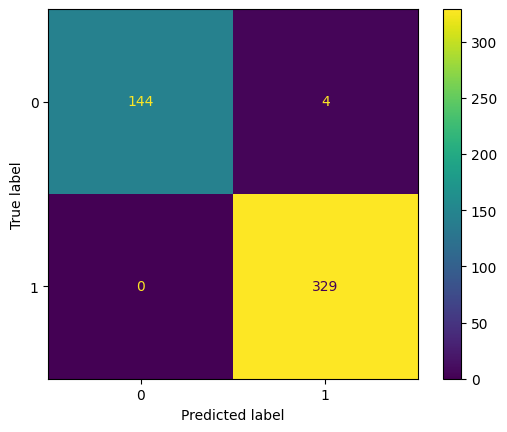

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = grid.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_).plot()

In [ ]:
rf_clf = RandomForestClassifier(max_depth=10, n_estimators=200, max_features= 8, criterion= 'gini', bootstrap = True)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, x_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 97.51 
 Validation: 90.02
K-Fold Accuracy Std: 
 Train: 0.27, 
 Validation: 1.83


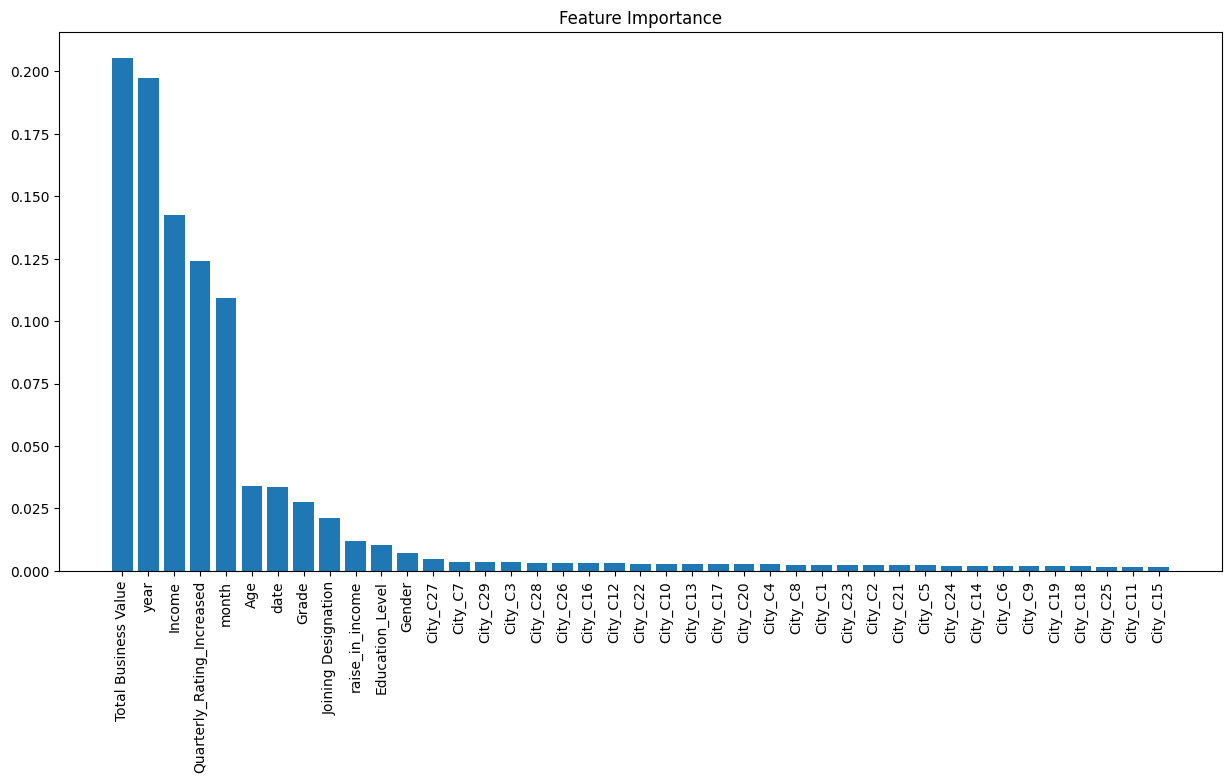

In [ ]:
# Feature Importance

import matplotlib.pyplot as plt

rf_clf.fit(x, y)
importances = rf_clf.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [x_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(x_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(x_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## **Feature Importance:**

Total_Business_Value, year, Income, Quarterly_Rating_Increased and month are the most important feature

## **Random Forest Classifier with imbalanced class weight**

Out of all prediction, the measure for correctly predicted 0 is 100% and for 1 is 99% (Precision)

Out of all actual 0, the measure for correctly predicted is 97% and for 1 is 100% (Recall)

As this is imbalanced dataset. We give importance to F1-Score metrics

F1 Score of 0 is 99%
F! Score of 1 is 99%

## **Class Imbalance treatment**

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 7)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 1287
Before OverSampling, counts of label '0': 617 

After OverSampling, the shape of train_X: (2574, 41)
After OverSampling, the shape of train_y: (2574,) 

After OverSampling, counts of label '1': 1287
After OverSampling, counts of label '0': 1287


# **Random Forest after Balancing the data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,4,5,7,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(x_test, y_test)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'n_estimators': 400}
Best score:  0.89937106918239


## **Classification Report**

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       148
           1       0.99      1.00      0.99       329

    accuracy                           0.99       477
   macro avg       0.99      0.98      0.99       477
weighted avg       0.99      0.99      0.99       477



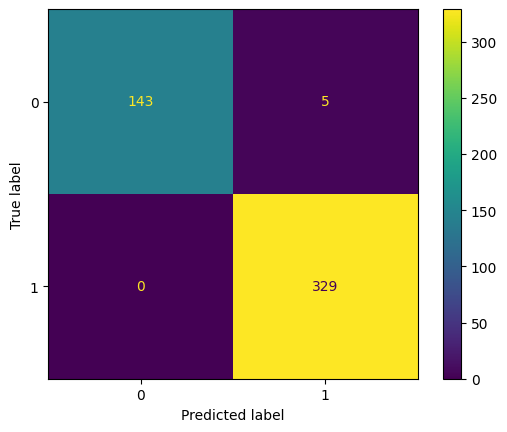

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = grid.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_).plot()

In [ ]:
rf_clf = RandomForestClassifier(max_depth=10, n_estimators=400, max_features= 9, criterion= 'gini', bootstrap = True)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, x_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 97.47 
 Validation: 91.57
K-Fold Accuracy Std: 
 Train: 0.22, 
 Validation: 2.85


## **ROC AUC Curve & comments**

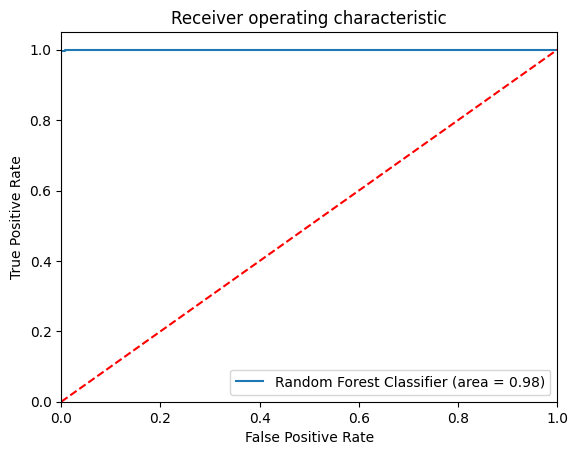

In [ ]:
from sklearn.metrics import roc_auc_score

logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,grid.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## **Random Forest Classifier with balanced class weight**

Out of all prediction, the measure for correctly predicted 0 is 100% and for 1 is 99% (Precision)
Out of all actual 0, the measure for correctly predicted is 97% and for 1 is 100% (Recall)

 **F1-Score metrics**

F1 Score of 0 is 98%
F1 Score of 1 is 99%

# **Gradient Boosting**

## **Classification Report**

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best Params:  {'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Score:  0.9160839160839161

 Elapsed Time:  744.8709750175476
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       148
           1       0.93      0.89      0.91       329

    accuracy                           0.88       477
   macro avg       0.85      0.87      0.86       477
weighted avg       0.88      0.88      0.88       477



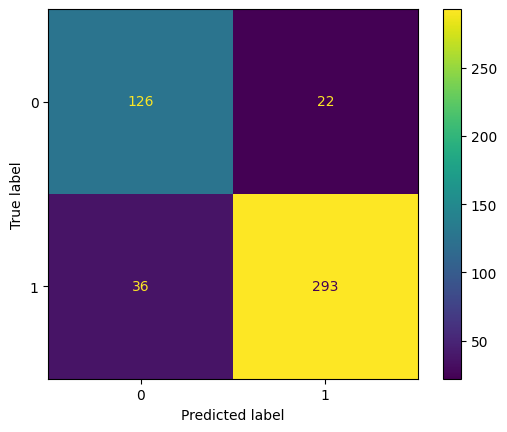

In [ ]:
params = {
    "max_depth": [2, 3, 4],
    "loss": ["log_loss", "exponential"],
    "subsample": [0.1, 0.2, 0.5, 0.8, 1],
    "learning_rate": [0.1, 0.2, 0.3],
    "n_estimators": [100,200,300,400]
}


from sklearn.ensemble import GradientBoostingClassifier
import time

gbdt = GradientBoostingClassifier()
start_time = time.time()
c = GridSearchCV(estimator=gbdt, cv=3, n_jobs=-1, verbose=True, param_grid=params)

c.fit(x_train, y_train)
print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)

elapsed_time = time.time() - start_time
print("\n Elapsed Time: ", elapsed_time)

y_pred = c.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()

## **ROC AUC Curve & comments**

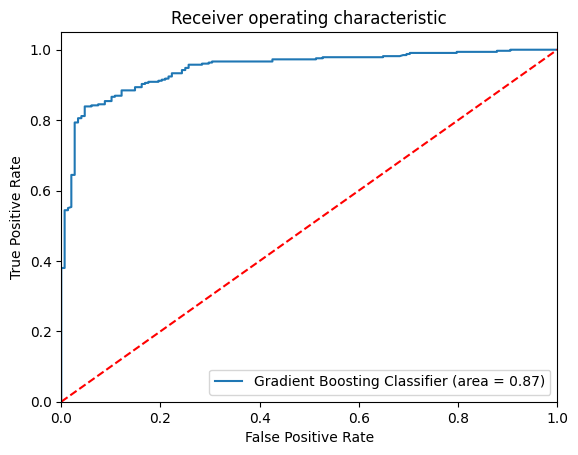

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,c.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## **Gradient Boosting Classifier Metrics**

Out of all prediction, the measure for correctly predicted 0 is 78% and for 1 is 93% (Precision)
Out of all actual 0, the measure for correctly predicted is 85% and for 1 is 89% (Recall)

**F1-Score metrics**

F1 Score of 0 is 81%
F1 Score of 1 is 91%

## **Actionable Insights**


1. Out of 2381 drivers, 1616 have left the company.
2. The Random Forest Classifier attains a Recall score of 100% for drivers who left the company, indicating the model is performing accurately.
3. We observe that we are not getting a very high recall on target 0, which may be due to a small unbalanced dataset. More data will overcome this issue.
4. The employees whose quarterly rating has increased are less likely to leave the organization.
5. Total_Business_Value, year, Income, Quarterly_Rating_Increased and month are the most important feature. The company needs to track these features as predictors.
6. The employees whose monthly salary has not increased are more likely to leave the organization.
7. Out of 2381 employees, the quarterly rating has not increased for 2076 employees. This is a red flag for the company that needs to be regulated.
8. We need to incentivize drivers with overtime or other perks to overcome churning.


## **Recommendations**

1. Company needs to look into why customers are not rating drivers.
2. The company needs to implement a reward system for customers providing feedback and rating drivers.
3. Company needs to get in touch with those drivers whose monthly salary has not increased and help them earn more by providing bonuses and perks.
We need to incentivize drivers with overtime or other perks to overcome churning.